In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [ ]:
data=pd.read_csv('/content/googleplaystore.csv')

In [ ]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
data=data.drop(data.index[10472])

In [ ]:
data["Reviews"] = data["Reviews"].astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


In [ ]:
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

* Remove all characters from size and convert it to float

In [ ]:
data['Size']=data['Size'].str.replace('M','000')
data['Size']=data['Size'].str.replace('k','')
#apps['size']=apps['size'].str.replace('.','')
data['Size']=data['Size'].replace("Varies with device",np.nan)
data['Size']=data['Size'].astype('float')
data['Size']

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10836    53000.0
10837        3.6
10838        9.5
10839        NaN
10840    19000.0
Name: Size, Length: 10840, dtype: float64

* There is a problem!! There are some applications size in megabyte and some in kilobyte


In [ ]:
###### Convert mega to kilo then convert all to mega
for i in data['Size']:
    if i < 10:
        data['Size']=data['Size'].replace(i,i*1000)
data['Size']=data['Size']/1000
data['Size']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: Size, Length: 10840, dtype: float64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


In [ ]:
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [ ]:
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [ ]:
items_to_remove=['+',',','$']
cols_to_clean=['Installs','Price']
for item in items_to_remove:
    for col in cols_to_clean:
        data[col]=data[col].str.replace(item,'')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
data.Installs.unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [ ]:
data['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [ ]:
data['Installs']=data['Installs'].astype('int')
data['Price']=data['Price'].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.4+ MB


In [ ]:
data['Last Updated'] = pd.to_datetime(data['Last Updated'])
data['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10840, dtype: datetime64[ns]

In [ ]:
data['Updated_Day']=data['Last Updated'].dt.day
data['Updated_Month']=data['Last Updated'].dt.month
data['Updated_Year']=data['Last Updated'].dt.year

In [ ]:
data.drop('Last Updated', axis=1, inplace=True)

In [ ]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Updated_Day,Updated_Month,Updated_Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,20,6,2018


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Current Ver     10832 non-null  object 
 11  Android Ver     10838 non-null  object 
 12  Updated_Day     10840 non-null  int32  
 13  Updated_Month   10840 non-null  int32  
 14  Updated_Year    10840 non-null  int32  
dtypes: float64(3), int32(3), int64(2), object(7)
memory usage: 1.5+ MB


In [ ]:
null = pd.DataFrame({'Null Values' : data.isna().sum().sort_values(ascending=False), 'Percentage Null Values' : (data.isna().sum().sort_values(ascending=False)) / (data.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
Size,1695,15.636531
Rating,1474,13.597786
Current Ver,8,0.073801
Android Ver,2,0.018450
Type,1,0.009225
App,0,0.000000
Category,0,0.000000
Reviews,0,0.000000
Installs,0,0.000000
Price,0,0.000000


<BarContainer object of 15 artists>

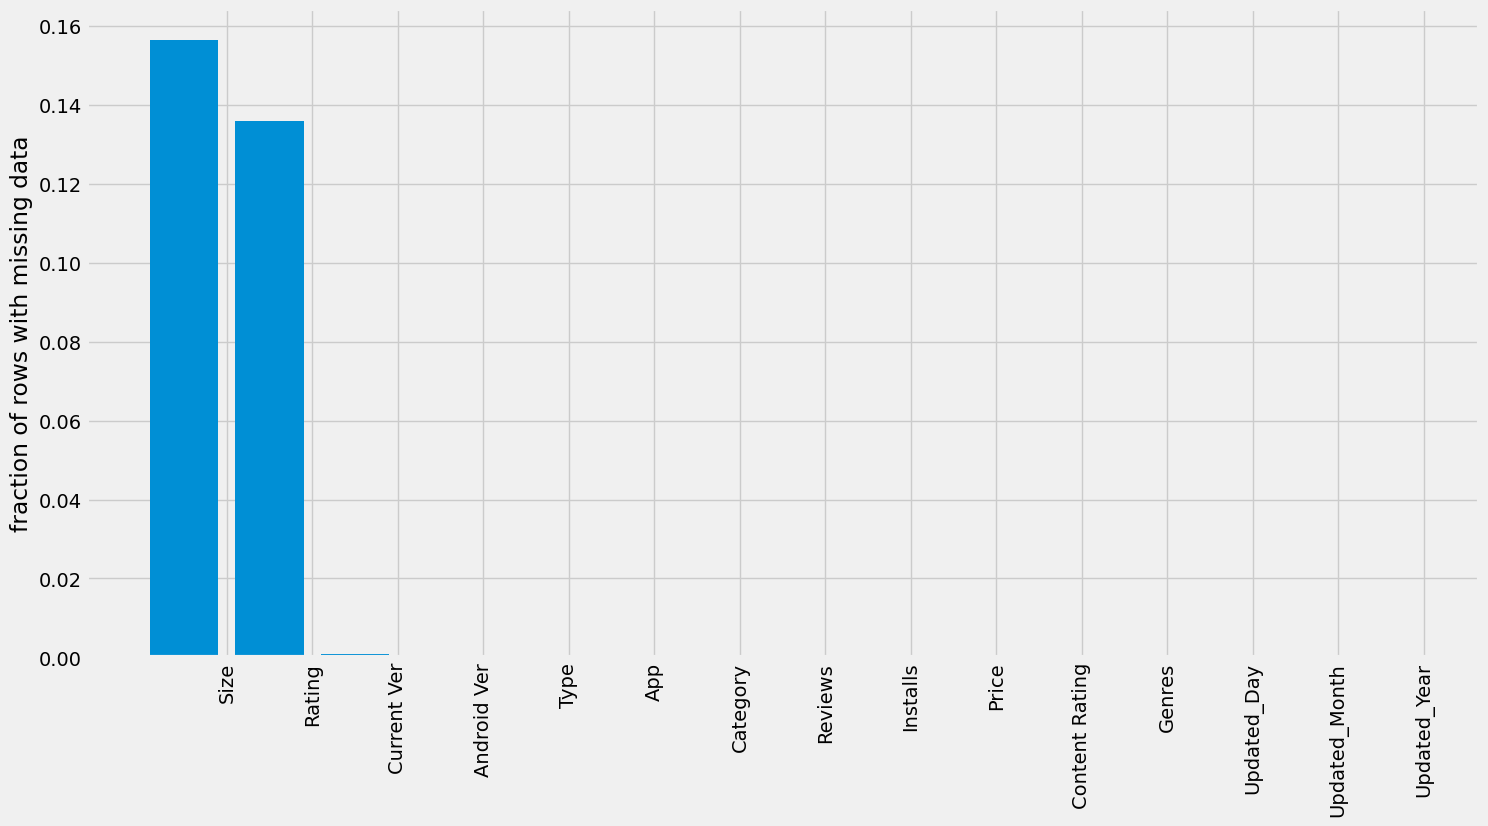

In [ ]:
null_counts = data.isna().sum().sort_values(ascending=False)/len(data)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

* I Clean missing values using Random Value Imputation Because This the best way to To maintain distrbuation For each feature.

In [ ]:
### lets create a function so that I can easily do it for all features
def Random_value_imputation(feature):
    random_sample=data[feature].dropna().sample(data[feature].isnull().sum())
    random_sample.index=data[data[feature].isnull()].index
    data.loc[data[feature].isnull(),feature]=random_sample

In [ ]:
for col in data:
    Random_value_imputation(col)

In [ ]:
null = pd.DataFrame({'Null Values' : data.isna().sum().sort_values(ascending=False), 'Percentage Null Values' : (data.isna().sum().sort_values(ascending=False)) / (data.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
App,0,0.0
Category,0,0.0
Rating,0,0.0
Reviews,0,0.0
Size,0,0.0
Installs,0,0.0
Type,0,0.0
Price,0,0.0
Content Rating,0,0.0
Genres,0,0.0


<BarContainer object of 15 artists>

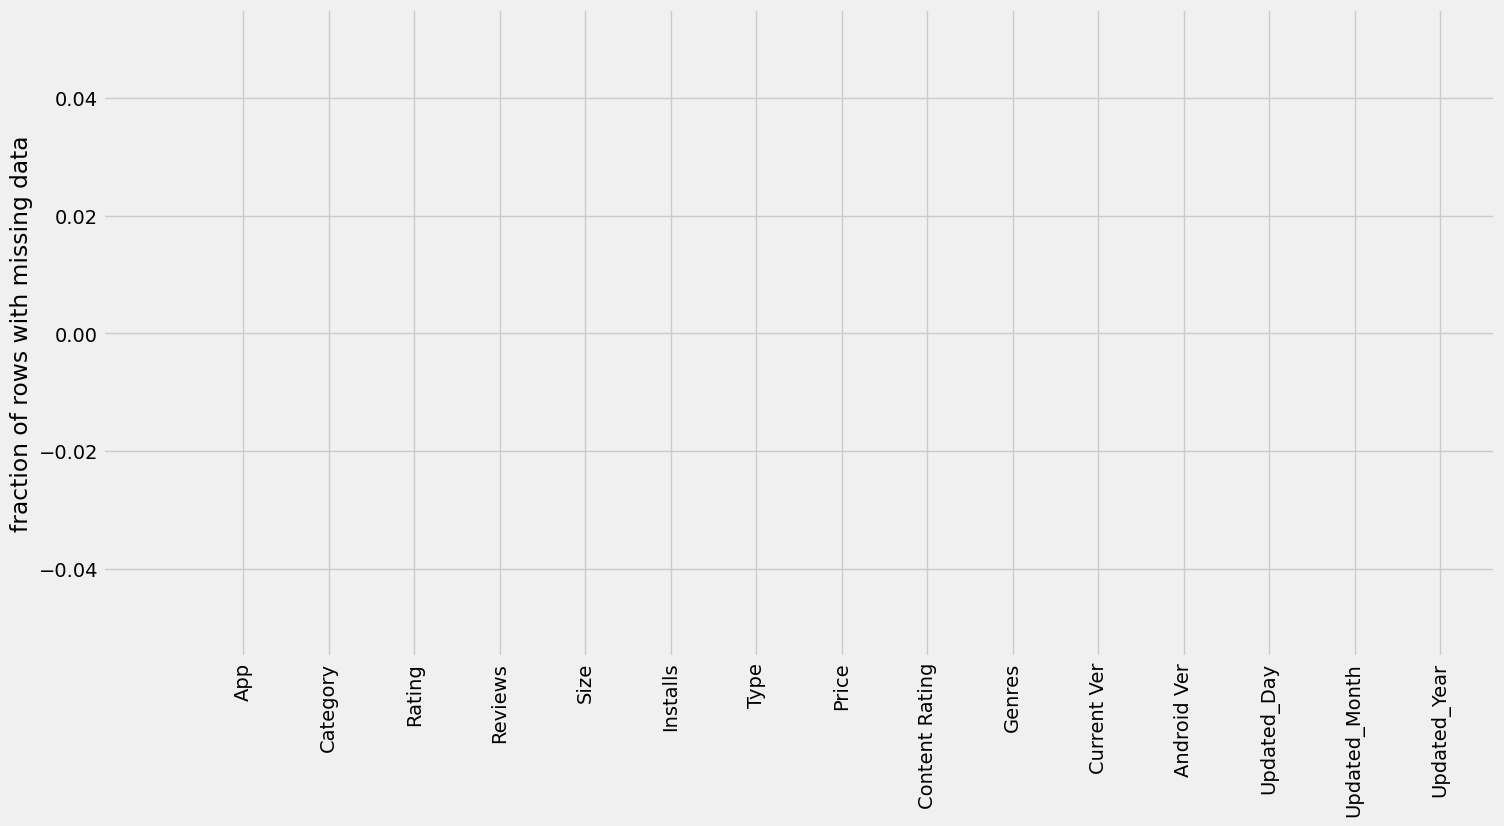

In [ ]:
null_counts = data.isna().sum().sort_values(ascending=False)/len(data)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

<a id = '6.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>delete data duplicated</strong></p>

In [ ]:
duplicate = data.duplicated()
print(duplicate.sum())

310


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
duplicate = data.duplicated()
print(duplicate.sum())

0


<a id = '5.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong> Extract Numerical & Categorical Features</strong></p>

In [ ]:
num_features=[col for col in data.columns if data[col].dtype!='O']
num_features

['Rating',
 'Reviews',
 'Size',
 'Installs',
 'Price',
 'Updated_Day',
 'Updated_Month',
 'Updated_Year']

In [ ]:
num_data = data[num_features]
num_data.head()

,Rating,Reviews,Size,Installs,Price,Updated_Day,Updated_Month,Updated_Year
0,4.1,159,19.0,10000,0.0,7,1,2018
1,3.9,967,14.0,500000,0.0,15,1,2018
2,4.7,87510,8.7,5000000,0.0,1,8,2018
3,4.5,215644,25.0,50000000,0.0,8,6,2018
4,4.3,967,2.8,100000,0.0,20,6,2018


In [ ]:
cat_features=[col for col in data.columns if data[col].dtype=='O']
cat_features

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver']

In [ ]:
categorical=data[cat_features]
categorical.head()

,App,Category,Type,Content Rating,Genres,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Free,Everyone,Art & Design,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,Free,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Free,Everyone,Art & Design,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,Free,Teen,Art & Design,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Free,Everyone,Art & Design;Creativity,1.1,4.4 and up


In [ ]:
categorical['Category'].value_counts()

Category
FAMILY                 1946
GAME                   1129
TOOLS                   843
BUSINESS                439
PRODUCTIVITY            420
MEDICAL                 415
PERSONALIZATION         391
COMMUNICATION           382
LIFESTYLE               375
SPORTS                  369
FINANCE                 363
PHOTOGRAPHY             324
HEALTH_AND_FITNESS      317
SOCIAL                  288
NEWS_AND_MAGAZINES      276
TRAVEL_AND_LOCAL        244
SHOPPING                239
BOOKS_AND_REFERENCE     230
DATING                  202
VIDEO_PLAYERS           175
EDUCATION               141
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          125
ENTERTAINMENT           124
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
HOUSE_AND_HOME           82
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: count, dtype: int64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'ART_AND_DESIGN'),
  Text(1, 0, 'AUTO_AND_VEHICLES'),
  Text(2, 0, 'BEAUTY'),
  Text(3, 0, 'BOOKS_AND_REFERENCE'),
  Text(4, 0, 'BUSINESS'),
  Text(5, 0, 'COMICS'),
  Text(6, 0, 'COMMUNICATION'),
  Text(7, 0, 'DATING'),
  Text(8, 0, 'EDUCATION'),
  Text(9, 0, 'ENTERTAINMENT'),
  Text(10, 0, 'EVENTS'),
  Text(11, 0, 'FINANCE'),
  Text(12, 0, 'FOOD_AND_DRINK'),
  Text(13, 0, 'HEALTH_AND_FITNESS'),
  Text(14, 0, 'HOUSE_AND_HOME'),
  Text(15, 0, 'LIBRARIES_AND_DEMO'),
  Text(16, 0, 'LIFESTYLE'),
  Text(17, 0, 'GAME'),
  Text(18, 0, 'FAMILY'),
  Text(19, 0, 'MEDICAL'),
  Text(20, 0, 'SOCIAL'),
  Text(21, 0, 'SHOPPING'),
  Text(22, 0, 'PHOTOGRAPHY'),
  Text(23, 0, 'SPORTS'),
  Text(24, 0, 'TRAVEL_AND_LOCAL'),
  Text(25, 0, 'TOOLS'),
  Text(26, 0, 'PERSONALIZATION'),
  Text(27, 0, 'PRODUCTIVITY

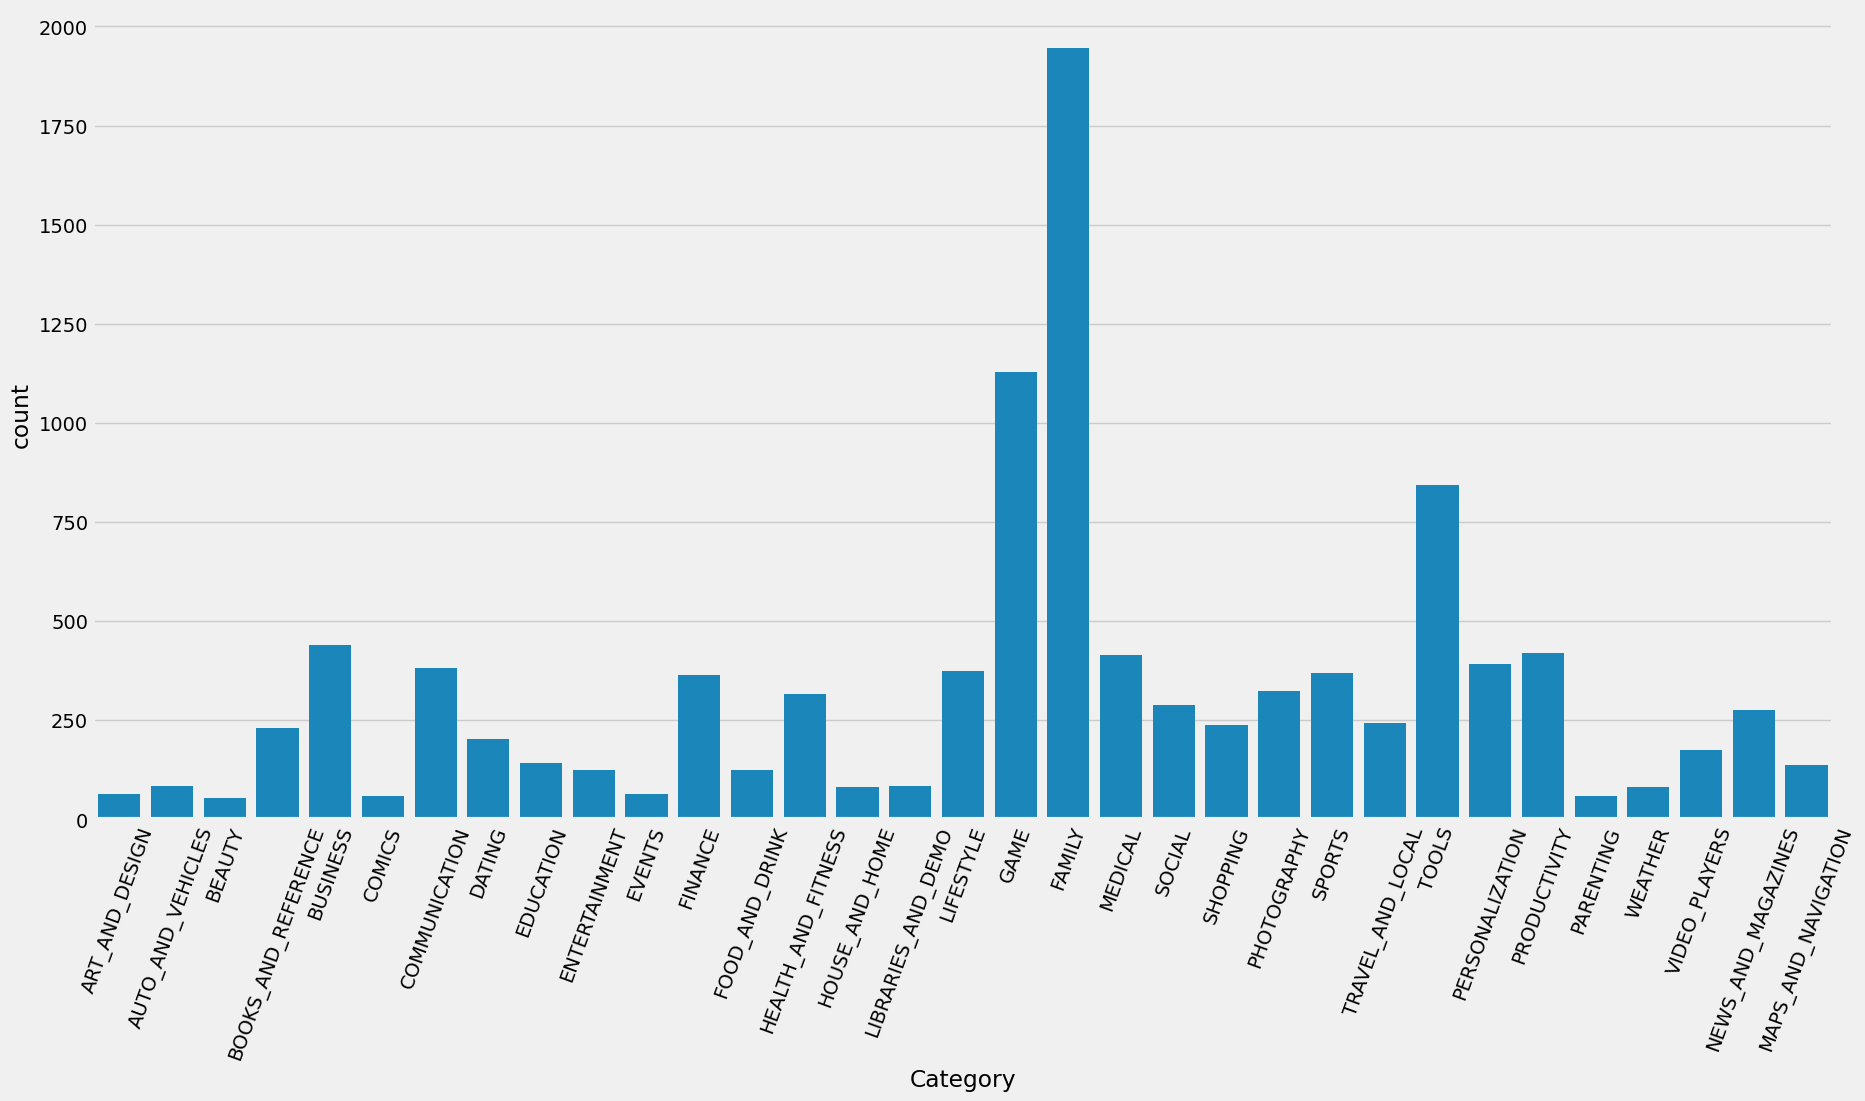

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(x='Category',data=data)
plt.xticks(rotation=70)

<a id = '8.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #008000; border-radius: 5px 5px;"><strong>Type Column</strong></p>

In [ ]:
categorical['Type'].value_counts()

Type
Free    9762
Paid     768
Name: count, dtype: int64

([0, 1], [Text(0, 0, 'Free'), Text(1, 0, 'Paid')])

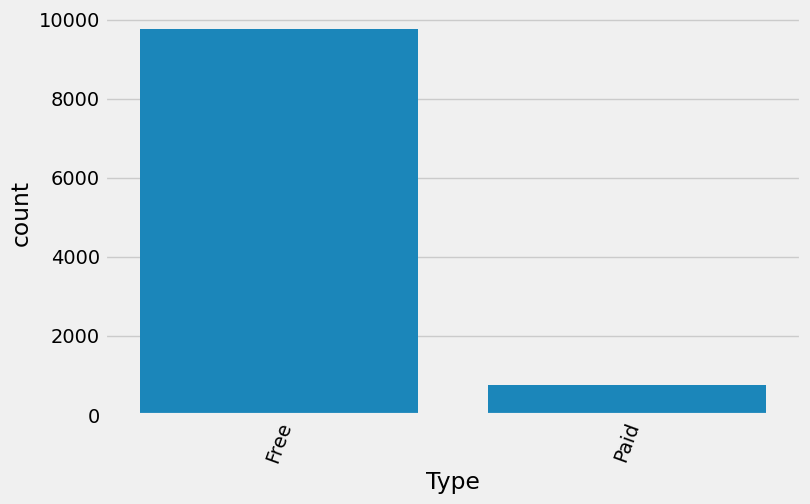

In [ ]:
plt.rcParams['figure.figsize'] = (8,5)
sns.countplot(x='Type',data=data)
plt.xticks(rotation=70)

<Axes: ylabel='count'>

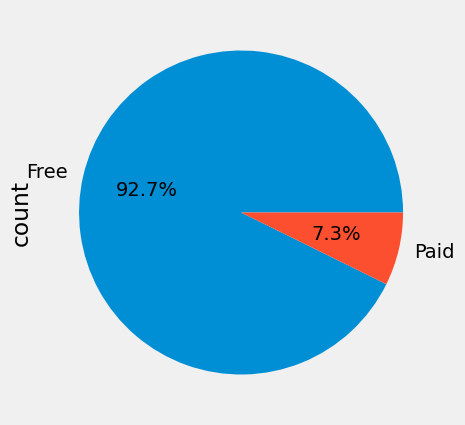

In [ ]:
data["Type"].value_counts().plot.pie(autopct = "%1.1f%%")

<a id = '8.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #008000; border-radius: 5px 5px;"><strong>Content Rating Column</strong></p>

In [ ]:
categorical['Content Rating'].value_counts()

Content Rating
Everyone           8497
Teen               1170
Mature 17+          463
Everyone 10+        395
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Everyone'),
  Text(1, 0, 'Teen'),
  Text(2, 0, 'Everyone 10+'),
  Text(3, 0, 'Mature 17+'),
  Text(4, 0, 'Adults only 18+'),
  Text(5, 0, 'Unrated')])

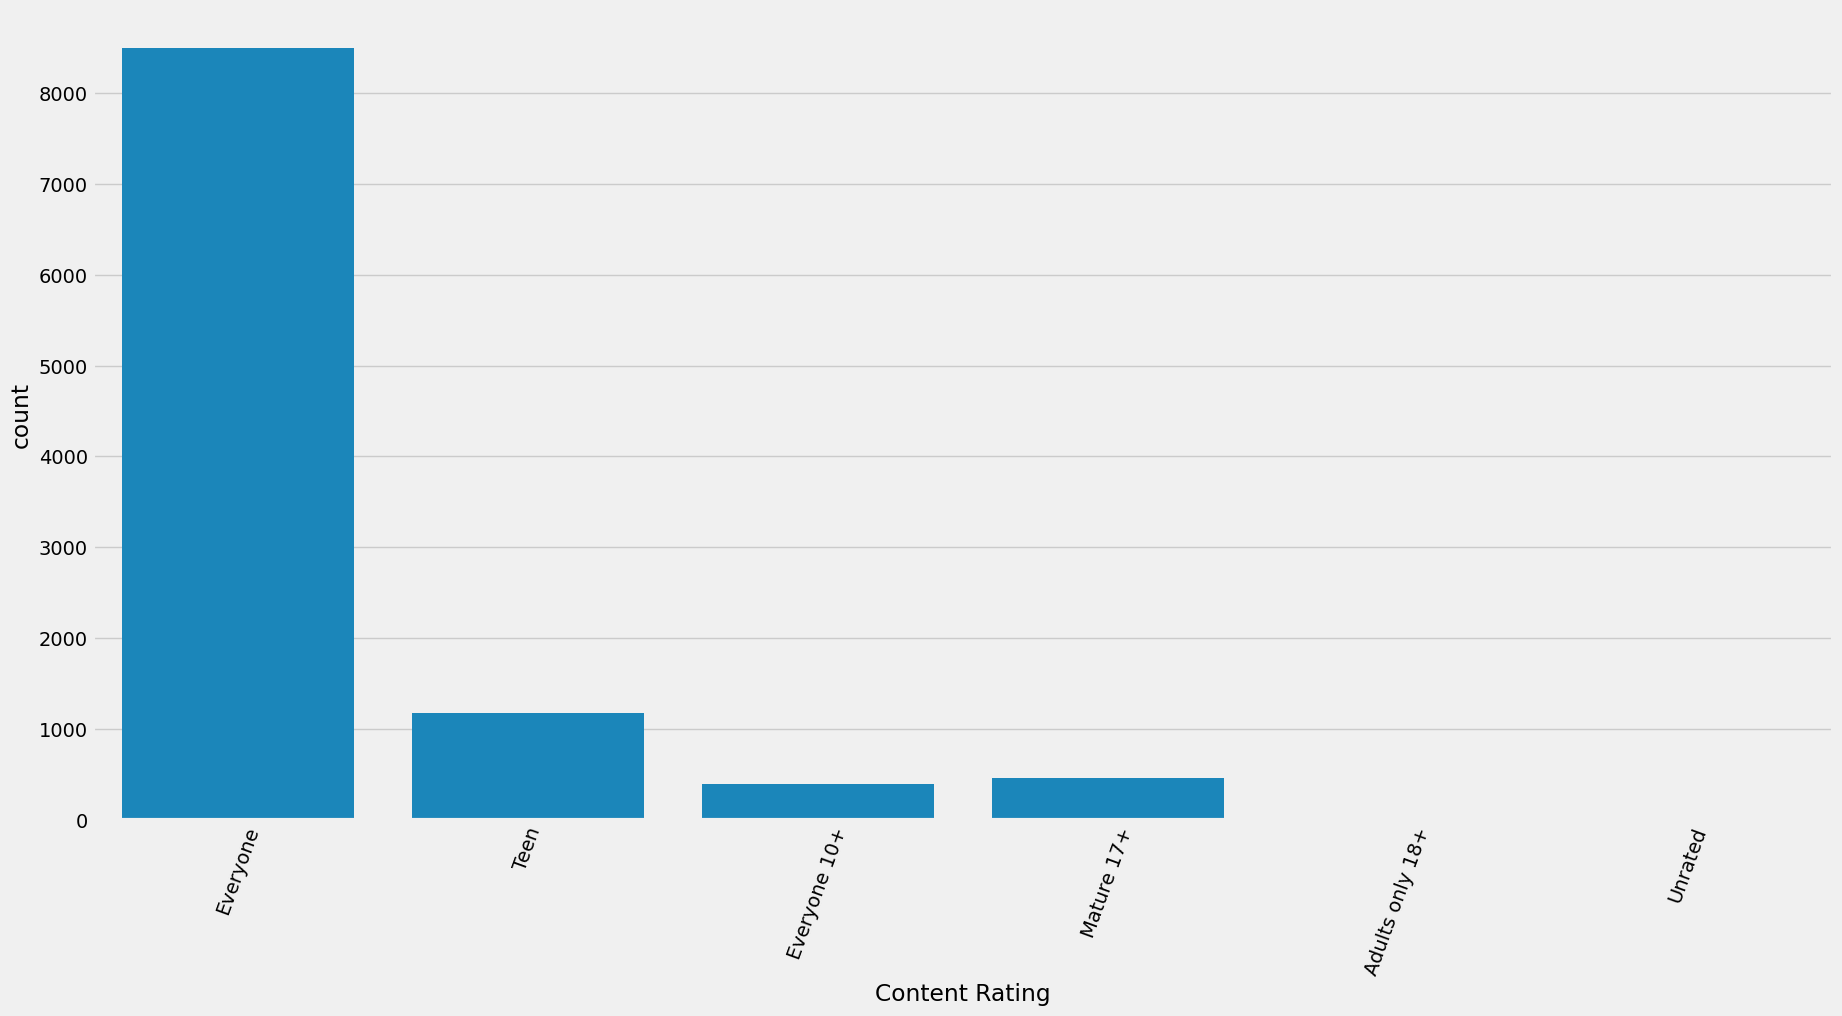

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(x='Content Rating',data=data)
plt.xticks(rotation=70)

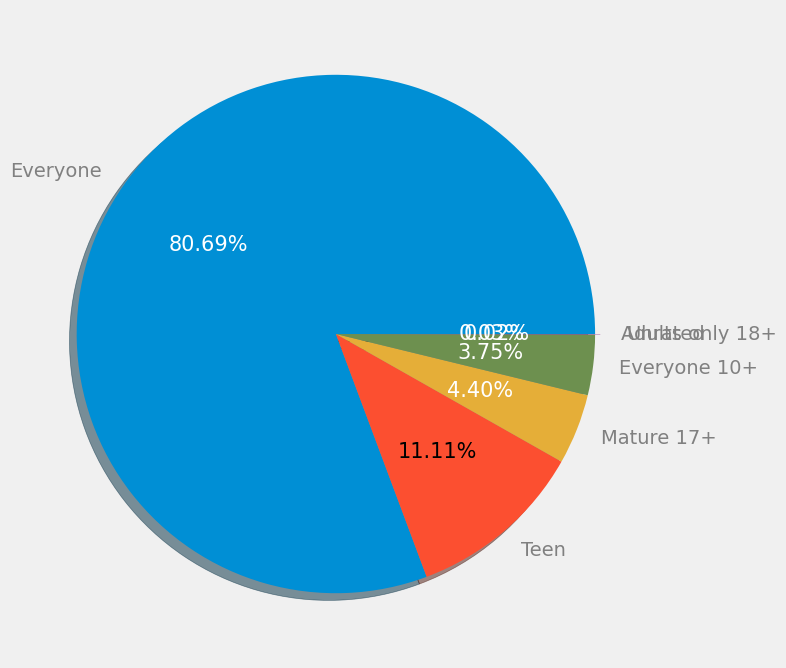

In [ ]:
# pie chart
values = data['Content Rating'].value_counts()
labels = ['Everyone', 'Teen', 'Mature 17+','Everyone 10+','Adults only 18+','Unrated']

fig, ax = plt.subplots(figsize = (12, 8), dpi = 100)
explode = (0,0,0,0,0,.02)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 0, explode = explode)

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 15, color = 'white')
autotexts[1].set_color('black')
plt.show()

<a id = '8.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #008000; border-radius: 5px 5px;"><strong>Genres Column</strong></p>

In [ ]:
categorical['Genres'].value_counts()

Genres
Tools                                842
Entertainment                        601
Education                            536
Business                             439
Productivity                         420
                                    ... 
Parenting;Brain Games                  1
Travel & Local;Action & Adventure      1
Lifestyle;Pretend Play                 1
Tools;Education                        1
Strategy;Creativity                    1
Name: count, Length: 119, dtype: int64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118],
 [Text(0, 0, 'Art & Design'),
  Text(1, 0, 'Art & Design;Pretend Play'),
  Text(2, 0, 'Art & Design;Creativity'),
  Text(3, 0, 'Art & Design;Action & Adventure'),
  Text(4, 0, 'Auto & Vehicles'),
  Text(5, 0, 'Beauty'),
  Text(6, 0, 'Books & Reference'),
  Text(7, 0, 'Busines

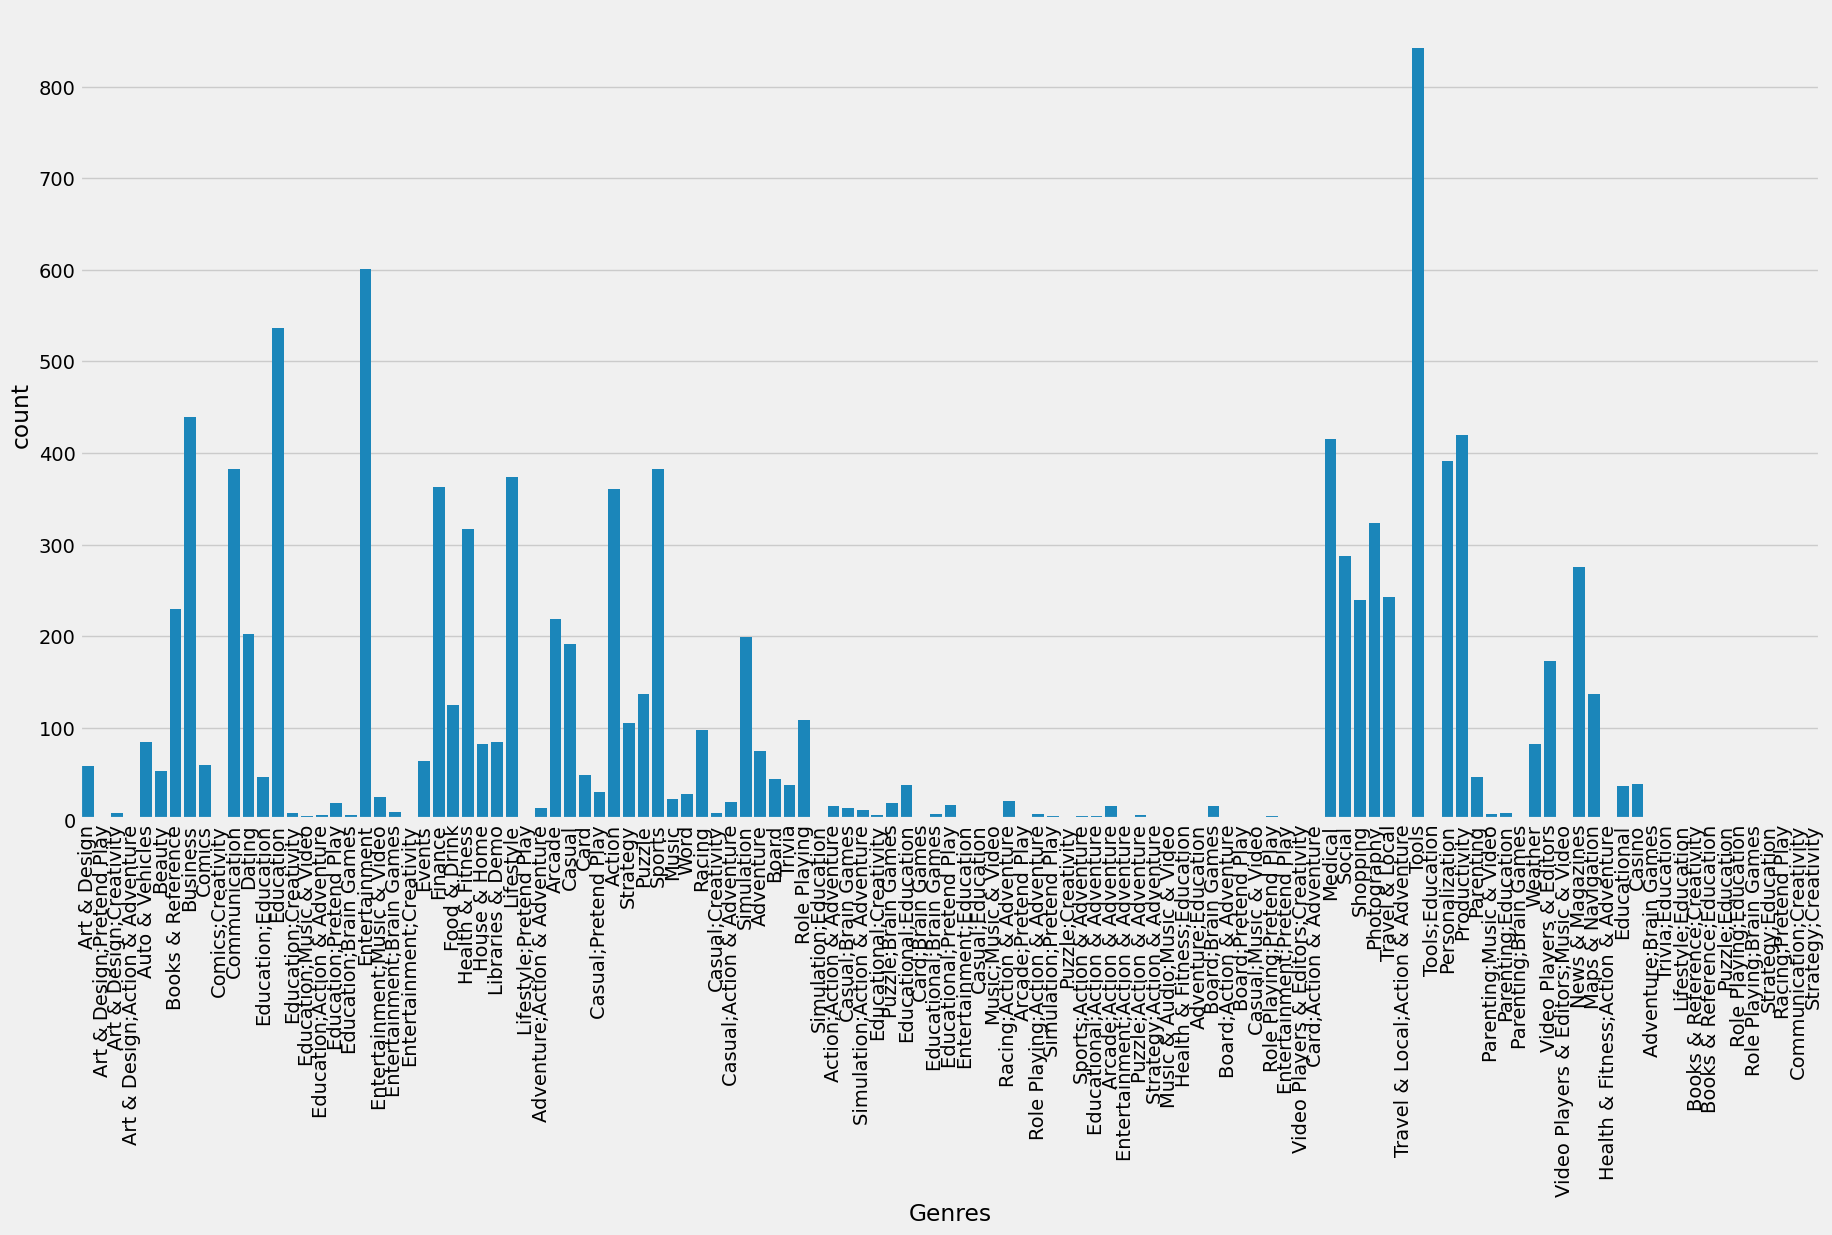

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(x='Genres',data=data)
plt.xticks(rotation=90)

<a id = '8.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #008000; border-radius: 5px 5px;"><strong>Current Ver Column</strong></p>

In [ ]:
categorical['Current Ver'].value_counts()

Current Ver
Varies with device    1451
1.0                    803
1.1                    260
1.2                    179
2.0                    149
                      ... 
12.2.7.3671              1
8.50.935520              1
1.8.4.5                  1
2.9.10                   1
2.0.148.0                1
Name: count, Length: 2831, dtype: int64

<a id = '8.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #008000; border-radius: 5px 5px;"><strong>Android Ver Column</strong></p>

In [ ]:
categorical['Android Ver'].value_counts()

Android Ver
4.1 and up            2385
4.0.3 and up          1460
Varies with device    1357
4.0 and up            1339
4.4 and up             905
2.3 and up             644
5.0 and up             556
4.2 and up             387
2.3.3 and up           279
2.2 and up             239
3.0 and up             237
4.3 and up             235
2.1 and up             133
1.6 and up             116
6.0 and up              58
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              22
1.5 and up              20
4.4W and up             11
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: count, dtype: int64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, '4.0.3 and up'),
  Text(1, 0, '4.2 and up'),
  Text(2, 0, '4.4 and up'),
  Text(3, 0, '2.3 and up'),
  Text(4, 0, '3.0 and up'),
  Text(5, 0, '4.1 and up'),
  Text(6, 0, '4.0 and up'),
  Text(7, 0, '2.3.3 and up'),
  Text(8, 0, 'Varies with device'),
  Text(9, 0, '2.2 and up'),
  Text(10, 0, '5.0 and up'),
  Text(11, 0, '6.0 and up'),
  Text(12, 0, '1.6 and up'),
  Text(13, 0, '1.5 and up'),
  Text(14, 0, '2.1 and up'),
  Text(15, 0, '7.0 and up'),
  Text(16, 0, '5.1 and up'),
  Text(17, 0, '4.3 and up'),
  Text(18, 0, '4.0.3 - 7.1.1'),
  Text(19, 0, '2.0 and up'),
  Text(20, 0, '3.2 and up'),
  Text(21, 0, '4.4W and up'),
  Text(22, 0, '7.1 and up'),
  Text(23, 0, '7.0 - 7.1.1'),
  Text(24, 0, '8.0 and up'),
  Text(25, 0, '5.0 - 8.0'),
  Text(26, 0, '3.1 and up'),
  Text(27, 0, '2.0.1 a

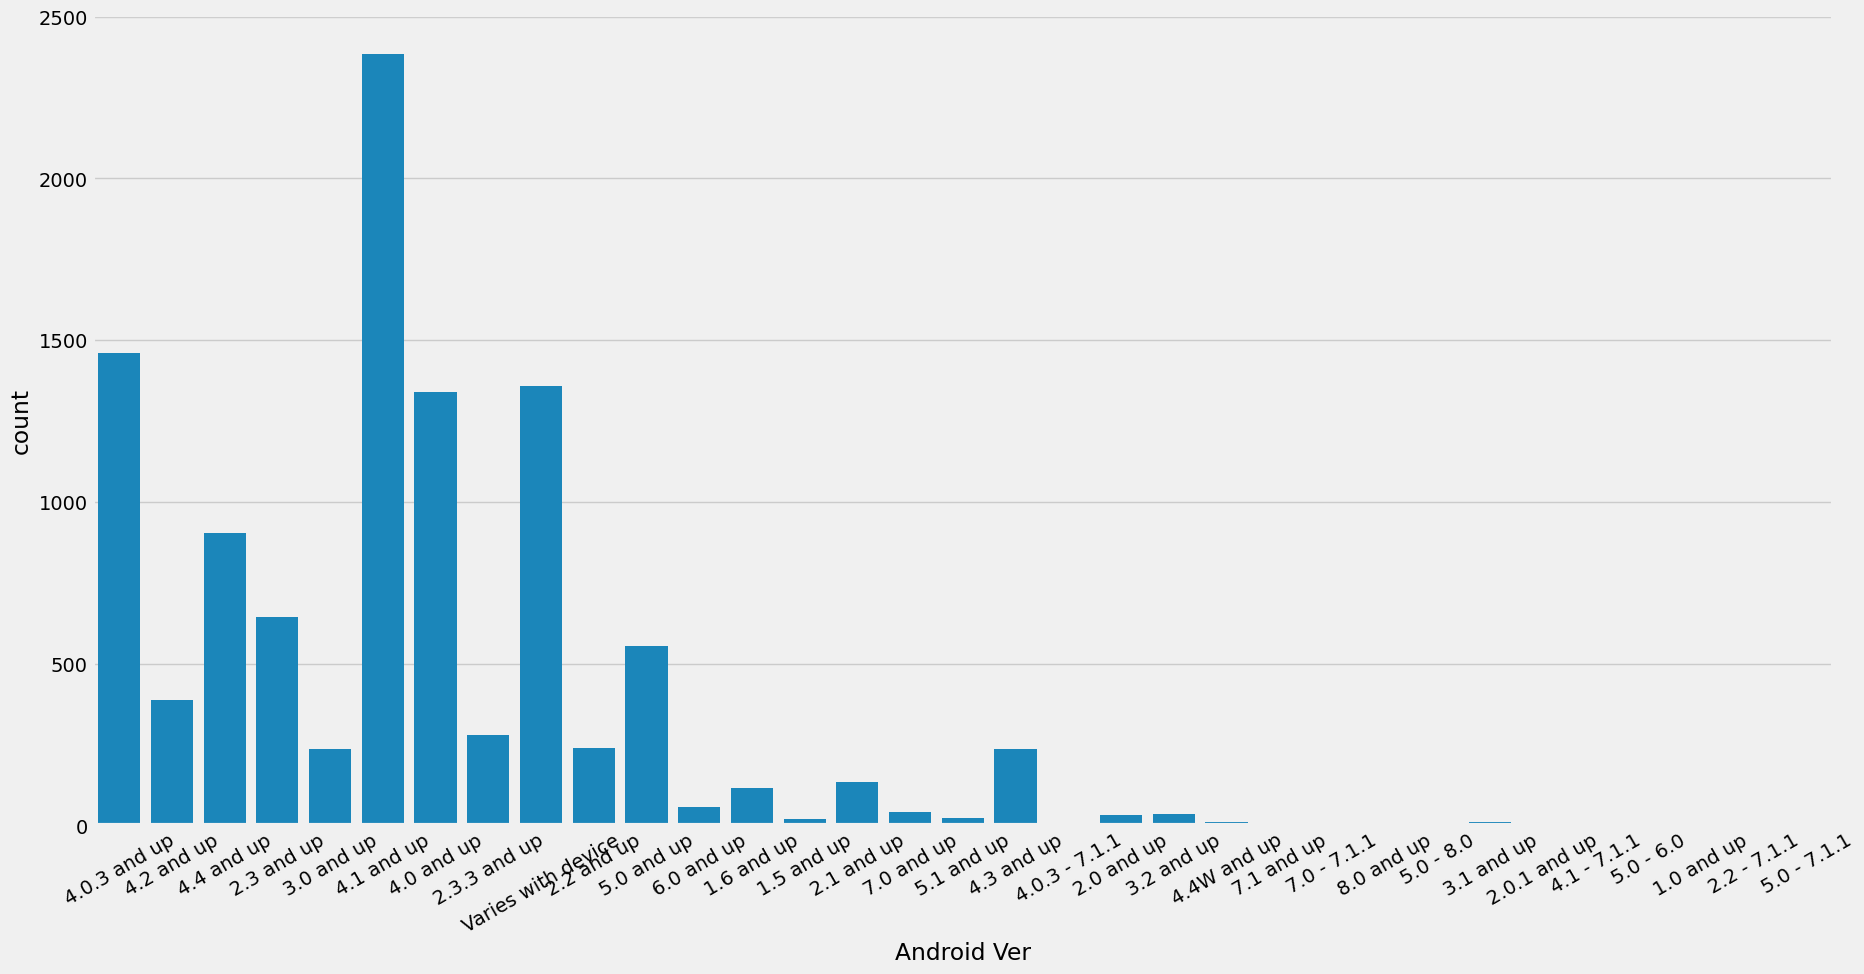

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(x='Android Ver',data=data)
plt.xticks(rotation=30)

### Content Rating vs Android Ver Analysis

<a id = '9.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>Check Co-relation</strong></p>


In [ ]:
# Select only numeric columns
numeric_data = data.select_dtypes(include='number')

# Calculate correlation with the "Rating" column
correlation = pd.DataFrame({'correlation': numeric_data.corr()["Rating"].abs().sort_values(ascending=False)[1:]})

# Print or use the correlation DataFrame
print(correlation)


               correlation
Updated_Year      0.115327
Reviews           0.061869
Size              0.059211
Installs          0.047309
Updated_Month     0.020370
Price             0.015808
Updated_Day       0.012747


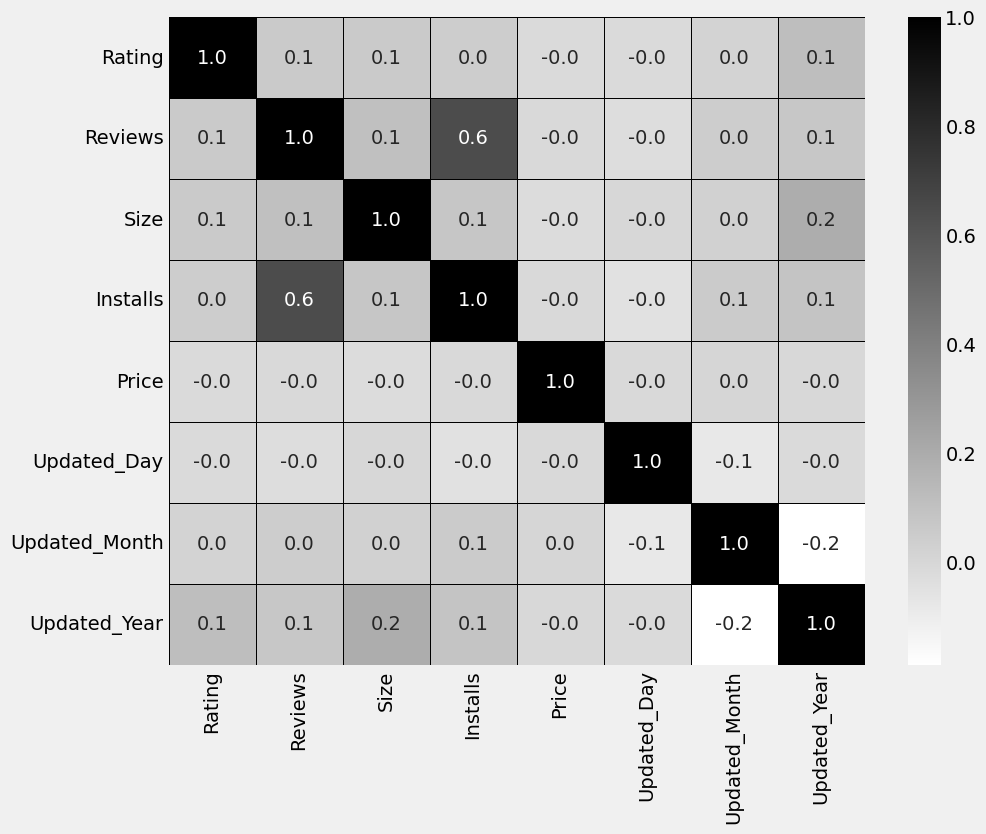

In [ ]:
numeric_data = data.select_dtypes(include='number')

# Compute correlation matrix
correlation = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, linewidths=0.5, linecolor="black", fmt='.1f', cmap='gray_r')
plt.show()

In [ ]:
y=data['Rating']
X=num_data
cols=X.columns
cols

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Updated_Day',
       'Updated_Month', 'Updated_Year'],
      dtype='object')

<a id = '7.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>Splitting Dataset</strong></p>


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=0)

In [ ]:
# Import Libraries
from sklearn.preprocessing import StandardScaler

In [ ]:
#Creating a StandardScaler object to normalize the X train and test set feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)


pip pppjppp<a id = '13.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>Defining function For ML model</strong></p>

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
def predict(ml_model):
    model=ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    print('\n')
    y_prediction=model.predict(X_test)
    print('Testing score : {}'.format(model.score(X_test,y_test)))
    print('\n')

    print('predictions are: \n {}'.format(y_prediction[:10]))
    print('\n')
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score: {}'.format(r2_score))
    print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))

<a id = '12.0'></a>
<p style = "font-size : 35px; color : #E0FFFF ; font-family : 'Comic Sans MS'; text-align : center; background-color : #4682B4; border-radius: 5px 5px;"><strong>Gradient Boosting</strong></p>


In [ ]:
predict(GradientBoostingRegressor())

Training score : 0.9999999910924807


Testing score : 0.9999999908526767


predictions are: 
 [4.29999828 3.90001122 4.1000074  4.1000074  4.49998991 4.79996975
 4.79996975 4.29999828 3.60001913 4.20000126]


r2 score: 0.9999999908526767
MAE: 1.8087422438087913e-05
MSE: 2.443776279329204e-09
RMSE: 4.943456563305886e-05


In [ ]:
from lightgbm import LGBMRegressor
predict(LGBMRegressor())

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000403 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 610
[LightGBM] [Info] Number of data points in the train set: 7897, number of used features: 8
[LightGBM] [Info] Start training from score 4.190718
Training score : 0.9997697280128084


Testing score : 0.9995787832529652


predictions are: 
 [4.29999892 3.90000893 4.10000017 4.10000017 4.49999158 4.7999814
 4.7999814  4.29999892 3.599879   4.20000073]


r2 score: 0.9995787832529652
MAE: 0.000699842434041087
MSE: 0.00011253122394020462
RMSE: 0.010608073526338541


In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 9.1 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Step 1: Feature Extraction with Neural Networks
def neural_network_feature_extraction(X_train, X_test):
    model = Sequential()
    # Add layers to the neural network for feature extraction
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    # Output layer for feature extraction
    model.add(Dense(8, activation='relu'))

    # Compile the model
    model.compile(optimizer='adam', loss='mse')
    # Fit the model
    model.fit(X_train, X_train, epochs=10, batch_size=32, validation_data=(X_test, X_test))

    # Extract features from the trained model
    feature_extractor = Sequential(model.layers[:-1])
    extracted_features_train = feature_extractor.predict(X_train)
    extracted_features_test = feature_extractor.predict(X_test)

    return extracted_features_train, extracted_features_test

# Step 2: Prediction with CatBoost
def predict_with_catboost(X_train_features, y_train, X_test_features, y_test):
    # Initialize CatBoost regressor
    model = CatBoostRegressor()

    # Train the CatBoost model
    model.fit(X_train_features, y_train)

    # Make predictions
    y_pred = model.predict(X_test_features)

    # Evaluate the model
    print('R2 score:', model.score(X_test_features, y_test))
    print('MAE:', mean_absolute_error(y_test, y_pred))
    print('MSE:', mean_squared_error(y_test, y_pred))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

# Load your data and split it into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Feature Extraction with Neural Networks
X_train_features, X_test_features = neural_network_feature_extraction(X_train, X_test)

# Step 2: Prediction with CatBoost
predict_with_catboost(X_train_features, y_train, X_test_features, y_test)


Epoch 1/10
264/264 [==============================] - 2s 4ms/step - loss: 405839076655104.0000 - val_loss: 1654564847616.0000
Epoch 2/10
264/264 [==============================] - 1s 3ms/step - loss: 990775672832.0000 - val_loss: 1584150609920.0000
Epoch 3/10
264/264 [==============================] - 1s 2ms/step - loss: 971115134976.0000 - val_loss: 1574487326720.0000
Epoch 4/10
264/264 [==============================] - 1s 2ms/step - loss: 954132594688.0000 - val_loss: 1568846643200.0000
Epoch 5/10
264/264 [==============================] - 1s 2ms/step - loss: 953607716864.0000 - val_loss: 1568656588800.0000
Epoch 6/10
264/264 [==============================] - 1s 2ms/step - loss: 953631506432.0000 - val_loss: 1568658292736.0000
Epoch 7/10
264/264 [==============================] - 1s 3ms/step - loss: 953577504768.0000 - val_loss: 1568869974016.0000
Epoch 8/10
264/264 [==============================] - 1s 4ms/step - loss: 975152676864.0000 - val_loss: 1752771198976.0000
Epoch 9/10
26

In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Step 1: Feature Extraction with Neural Networks
def neural_network_feature_extraction(X_train, X_test):
    model = Sequential()
    # Add layers to the neural network for feature extraction
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    # Output layer for feature extraction
    model.add(Dense(8, activation='relu'))

    # Compile the model
    model.compile(optimizer='adam', loss='mse')
    # Fit the model
    model.fit(X_train, X_train, epochs=990, batch_size=32, validation_data=(X_test, X_test))

    # Extract features from the trained model
    feature_extractor = Sequential(model.layers[:-1])
    extracted_features_train = feature_extractor.predict(X_train)
    extracted_features_test = feature_extractor.predict(X_test)

    return extracted_features_train, extracted_features_test

# Step 2: Prediction with CatBoost
def predict_with_catboost(X_train_features, y_train, X_test_features, y_test):
    # Initialize CatBoost regressor
    model = CatBoostRegressor()

    # Train the CatBoost model
    model.fit(X_train_features, y_train)

    # Make predictions
    y_pred = model.predict(X_test_features)

    # Evaluate the model
    print('R2 score:', model.score(X_test_features, y_test))
    print('MAE:', mean_absolute_error(y_test, y_pred))
    print('MSE:', mean_squared_error(y_test, y_pred))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

# Load your data and split it into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Feature Extraction with Neural Networks
X_train_features, X_test_features = neural_network_feature_extraction(X_train, X_test)

# Step 2: Prediction with CatBoost
predict_with_catboost(X_train_features, y_train, X_test_features, y_test)


Epoch 1/990
264/264 [==============================] - 2s 3ms/step - loss: 61513280782336.0000 - val_loss: 1601260093440.0000
Epoch 2/990
264/264 [==============================] - 1s 2ms/step - loss: 978789728256.0000 - val_loss: 1581490634752.0000
Epoch 3/990
264/264 [==============================] - 1s 3ms/step - loss: 954801061888.0000 - val_loss: 1568694730752.0000
Epoch 4/990
264/264 [==============================] - 1s 5ms/step - loss: 953964036096.0000 - val_loss: 1568812695552.0000
Epoch 5/990
264/264 [==============================] - 1s 3ms/step - loss: 1208761974784.0000 - val_loss: 3518648549376.0000
Epoch 6/990
264/264 [==============================] - 1s 2ms/step - loss: 6350520713216.0000 - val_loss: 1570262745088.0000
Epoch 7/990
264/264 [==============================] - 1s 2ms/step - loss: 955545092096.0000 - val_loss: 1569454424064.0000
Epoch 8/990
264/264 [==============================] - 1s 2ms/step - loss: 956100247552.0000 - val_loss: 1569341964288.0000
Epoc

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import xgboost as xgb

# Step 1: Feature Extraction with Neural Networks
def neural_network_feature_extraction(X_train, X_test):
    model = Sequential()
    # Add layers to the neural network for feature extraction
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    # Output layer for feature extraction
    model.add(Dense(8, activation='relu'))

    # Compile the model
    model.compile(optimizer='adam', loss='mse')
    # Fit the model
    model.fit(X_train, X_train, epochs=100, batch_size=32, validation_data=(X_test, X_test))

    # Extract features from the trained model
    feature_extractor = Sequential(model.layers[:-1])
    extracted_features_train = feature_extractor.predict(X_train)
    extracted_features_test = feature_extractor.predict(X_test)

    return extracted_features_train, extracted_features_test

# Step 2: Prediction with XGBoost
def predict_with_xgboost(X_train_features, y_train, X_test_features, y_test):
    # Initialize XGBoost regressor
    model = xgb.XGBRegressor()

    # Train the XGBoost model
    model.fit(X_train_features, y_train)

    # Make predictions
    y_pred = model.predict(X_test_features)

    # Evaluate the model
    print('R2 score:', model.score(X_test_features, y_test))
    print('MAE:', mean_absolute_error(y_test, y_pred))
    print('MSE:', mean_squared_error(y_test, y_pred))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

# Load your data and split it into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Feature Extraction with Neural Networks
X_train_features, X_test_features = neural_network_feature_extraction(X_train, X_test)

# Step 2: Prediction with XGBoost
predict_with_xgboost(X_train_features, y_train, X_test_features, y_test)


Epoch 1/100
264/264 [==============================] - 2s 3ms/step - loss: 164564708622336.0000 - val_loss: 1572923244544.0000
Epoch 2/100
264/264 [==============================] - 1s 2ms/step - loss: 956405317632.0000 - val_loss: 1570264186880.0000
Epoch 3/100
264/264 [==============================] - 1s 2ms/step - loss: 958662901760.0000 - val_loss: 1569676197888.0000
Epoch 4/100
264/264 [==============================] - 1s 2ms/step - loss: 953751830528.0000 - val_loss: 1568662355968.0000
Epoch 5/100
264/264 [==============================] - 1s 2ms/step - loss: 954374160384.0000 - val_loss: 1568935641088.0000
Epoch 6/100
264/264 [==============================] - 1s 2ms/step - loss: 1002061430784.0000 - val_loss: 2554126139392.0000
Epoch 7/100
264/264 [==============================] - 1s 2ms/step - loss: 1050381582336.0000 - val_loss: 1580130107392.0000
Epoch 8/100
264/264 [==============================] - 1s 2ms/step - loss: 986857930752.0000 - val_loss: 1569922220032.0000
Epo

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load your data and split it into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Feature Extraction with Neural Networks
model_nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu')  # Output layer for feature extraction
])

# Compile the model
model_nn.compile(optimizer='adam', loss='mse')

# Fit the model
model_nn.fit(X_train, X_train, epochs=10, batch_size=32, validation_data=(X_test, X_test))

# Extract features from the trained model
X_train_features = model_nn.predict(X_train)
X_test_features = model_nn.predict(X_test)

# Step 2: Prediction with LightGBM
model_lgbm = LGBMRegressor()
model_lgbm.fit(X_train_features, y_train)

# Make predictions
y_pred = model_lgbm.predict(X_test_features)

# Evaluate the model
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))


Epoch 1/10
264/264 [==============================] - 4s 4ms/step - loss: 162408282718208.0000 - val_loss: 777220718592.0000
Epoch 2/10
264/264 [==============================] - 1s 3ms/step - loss: 595797344256.0000 - val_loss: 461925744640.0000
Epoch 3/10
264/264 [==============================] - 1s 2ms/step - loss: 410414317568.0000 - val_loss: 199808188416.0000
Epoch 4/10
264/264 [==============================] - 1s 2ms/step - loss: 77446799360.0000 - val_loss: 5960134656.0000
Epoch 5/10
264/264 [==============================] - 1s 2ms/step - loss: 31958732800.0000 - val_loss: 1948859136.0000
Epoch 6/10
264/264 [==============================] - 1s 2ms/step - loss: 2820359680.0000 - val_loss: 50718296.0000
Epoch 7/10
264/264 [==============================] - 1s 2ms/step - loss: 21137074176.0000 - val_loss: 396494077952.0000
Epoch 8/10
264/264 [==============================] - 1s 2ms/step - loss: 866226929664.0000 - val_loss: 1179673034752.0000
Epoch 9/10
264/264 [=============

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from lightgbm import LGBMRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load your data
# Assuming X and y are your feature and target matrices, respectively

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 1: Feature Extraction with Neural Networks
model_nn = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu')  # Output layer for feature extraction
])

# Compile the model
model_nn.compile(optimizer='adam', loss='mse')

# Fit the model
model_nn.fit(X_train_scaled, X_train_scaled, epochs=30, batch_size=128, validation_data=(X_test_scaled, X_test_scaled))

# Extract features from the trained model
X_train_features = model_nn.predict(X_train_scaled)
X_test_features = model_nn.predict(X_test_scaled)

# Step 2: Prediction with LightGBM
model_lgbm = LGBMRegressor(n_estimators=1000, learning_rate=0.05, max_depth=7, num_leaves=64, random_state=42)
model_lgbm.fit(X_train_features, y_train)

# Make predictions
y_pred = model_lgbm.predict(X_test_features)

# Evaluate the model
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))


Epoch 1/30
66/66 [==============================] - 3s 10ms/step - loss: 0.8224 - val_loss: 0.7792
Epoch 2/30
66/66 [==============================] - 0s 5ms/step - loss: 0.6918 - val_loss: 0.7605
Epoch 3/30
66/66 [==============================] - 0s 5ms/step - loss: 0.6735 - val_loss: 0.7613
Epoch 4/30
66/66 [==============================] - 0s 5ms/step - loss: 0.6695 - val_loss: 0.7568
Epoch 5/30
66/66 [==============================] - 0s 5ms/step - loss: 0.6636 - val_loss: 0.7560
Epoch 6/30
66/66 [==============================] - 0s 4ms/step - loss: 0.6622 - val_loss: 0.7575
Epoch 7/30
66/66 [==============================] - 0s 5ms/step - loss: 0.6621 - val_loss: 0.7571
Epoch 8/30
66/66 [==============================] - 0s 4ms/step - loss: 0.6576 - val_loss: 0.7561
Epoch 9/30
66/66 [==============================] - 0s 5ms/step - loss: 0.6581 - val_loss: 0.7554
Epoch 10/30
66/66 [==============================] - 0s 5ms/step - loss: 0.6571 - val_loss: 0.7587
Epoch 11/30
66/66 